# Shift Level Product Quality Aggregate

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Extracting the data
We have three stages of data importing into seperate dataframes

In [2]:
assembly_stage1 = pd.read_excel("../data/Assembly_shifts_data.xlsx",sheet_name='assembly_shift_count_stage1')

In [3]:
assembly_stage2 = pd.read_excel("../data/Assembly_shifts_data.xlsx",sheet_name='assembly_shift_count_stage2')

In [4]:
assembly_stage3 = pd.read_excel("../data/Assembly_shifts_data.xlsx",sheet_name='assembly_shift_count_stage3')

### Lets view the data

In [5]:
assembly_stage1

,stage1_id,assembly_line_id,shift_id,prod_id,Good_unit_count,rework_count,scrap_count
0,1005,44,12346,700,395,9,9
1,1002,45,12346,800,750,10,15
2,1003,45,12347,800,550,5,9
3,1004,44,12345,700,450,10,20
4,1001,45,12345,800,600,6,10
5,1006,45,12347,800,750,20,8
6,1007,44,12346,600,500,7,4


In [6]:
assembly_stage2

,stage2_id,assembly_line_id,shift_id,prod_id,Good_unit_count,rework_count,scrap_count
0,501,45,12345,800,590,3,5
1,502,45,12346,800,725,15,10
2,503,45,12347,800,540,5,5
3,504,44,12345,700,430,20,10
4,505,44,12346,700,380,15,10


In [7]:
assembly_stage3

,stage3_id,assembly_line_id,shift_id,prod_id,Good_unit_count,rework_count,scrap_count
0,100,45,12345,800,580,5,5
1,101,45,12346,800,700,15,10
2,102,45,12347,800,520,10,10
3,103,44,12345,700,430,0,0
4,104,44,12346,700,375,0,5


### Target Table

#### Our target table contains the following
- **_quality_id_** -  Unique id given by us in the last
- **_shift_id_** - shift id available from the data of the assembly line
- **_prod_id_** - Product id of the product assembled in the assembly line
- **_stage1_good_unit_count_** - Total goods assembled in stage 1
- **_stage1_rework_count_** - Sent to rework in stage 1
- **_stage1_scrap_count_** - Sent to scrap or the product that's rejected to due manufacturing or assembly defect
- **_stage2_good_unit_count_**  - Total goods assembled in stage 2
- **_stage2_rework_count_** - Sent to rework in stage 2
- **_stage_2_scrap_count_** - Sent to scrap or the product that's rejected to due manufacturing or assembly defect
- **_stage3_good_unit_count_** - Total goods assembled in stage 3
- **_stage3_rework_count_** - Sent to rework in stage 3
- **_stage3_scrap_count_** - Sent to scrap or the product that's rejected to due manufacturing or assembly defect
- **_total_rework_count_** - Total rework count of three stages of assembly line
- **_total_scrap_count_** - Total scrap count of three stages of assembly line


#### By viewing the dataset above we see that we do not require 
Stage id and assembly id because out final goal is to aggregate the data based on the shift and product_id. 
That is we need to know how quality is changing along different shifts. This also gives us insight of where the quality is less wrt to the shift

In [8]:
#Lets copy the original dataset to a new variable
stage1 = assembly_stage1.copy()
stage2 = assembly_stage2.copy()
stage3 = assembly_stage3.copy()

In [9]:
stage1.drop(['stage1_id','assembly_line_id'],axis=1,inplace=True)
stage2.drop(['stage2_id','assembly_line_id'],axis=1,inplace=True)
stage3.drop(['stage3_id','assembly_line_id'],axis=1,inplace=True)

In [10]:
stage1

,shift_id,prod_id,Good_unit_count,rework_count,scrap_count
0,12346,700,395,9,9
1,12346,800,750,10,15
2,12347,800,550,5,9
3,12345,700,450,10,20
4,12345,800,600,6,10
5,12347,800,750,20,8
6,12346,600,500,7,4


In [11]:
stage1_2merged = pd.merge(left=stage1,right=stage2,on=['shift_id','prod_id'],suffixes=("_stage1","_stage2"),how='left')

In [12]:
stage_1_2_3 = pd.merge(left=stage1_2merged,right=stage3,on=['shift_id','prod_id'],suffixes=("","_stage3"),how='left')

In [13]:
stage_1_2_3.columns

Index(['shift_id', 'prod_id', 'Good_unit_count_stage1', 'rework_count_stage1',
       'scrap_count_stage1', 'Good_unit_count_stage2', 'rework_count_stage2',
       'scrap_count_stage2', 'Good_unit_count', 'rework_count', 'scrap_count'],
      dtype='object')

In [14]:
new_column_name= {'Good_unit_count_stage1':'stage1_good_unit_count','rework_count_stage1':'stage1_rework_count','scrap_count_stage1':'stage1_scrap_count',
                  'Good_unit_count_stage2':'stage2_good_unit_count','rework_count_stage2':'stage2_rework_count','scrap_count_stage2':'stage2_scrap_count',
                 'Good_unit_count':'stage3_good_unit_count', 'rework_count':'stage3_rework_count', 'scrap_count':'stage3_scrap_count'}

In [15]:
stage_1_2_3.rename(new_column_name,axis=1,inplace=True)

In [16]:
stage_1_2_3

,shift_id,prod_id,stage1_good_unit_count,stage1_rework_count,stage1_scrap_count,stage2_good_unit_count,stage2_rework_count,stage2_scrap_count,stage3_good_unit_count,stage3_rework_count,stage3_scrap_count
0,12346,700,395,9,9,380.0,15.0,10.0,375.0,0.0,5.0
1,12346,800,750,10,15,725.0,15.0,10.0,700.0,15.0,10.0
2,12347,800,550,5,9,540.0,5.0,5.0,520.0,10.0,10.0
3,12345,700,450,10,20,430.0,20.0,10.0,430.0,0.0,0.0
4,12345,800,600,6,10,590.0,3.0,5.0,580.0,5.0,5.0
5,12347,800,750,20,8,540.0,5.0,5.0,520.0,10.0,10.0
6,12346,600,500,7,4,NaN,NaN,NaN,NaN,NaN,NaN


### Lets sum the rework count and scrap count and add quality_id

In [17]:
stage_1_2_3


,shift_id,prod_id,stage1_good_unit_count,stage1_rework_count,stage1_scrap_count,stage2_good_unit_count,stage2_rework_count,stage2_scrap_count,stage3_good_unit_count,stage3_rework_count,stage3_scrap_count
0,12346,700,395,9,9,380.0,15.0,10.0,375.0,0.0,5.0
1,12346,800,750,10,15,725.0,15.0,10.0,700.0,15.0,10.0
2,12347,800,550,5,9,540.0,5.0,5.0,520.0,10.0,10.0
3,12345,700,450,10,20,430.0,20.0,10.0,430.0,0.0,0.0
4,12345,800,600,6,10,590.0,3.0,5.0,580.0,5.0,5.0
5,12347,800,750,20,8,540.0,5.0,5.0,520.0,10.0,10.0
6,12346,600,500,7,4,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
stage_1_2_3['total_rework_count']=stage_1_2_3[['stage1_rework_count','stage2_rework_count','stage3_rework_count']].sum(axis=1)

In [19]:
stage_1_2_3['total_scrap_count']=stage_1_2_3[['stage1_scrap_count','stage2_scrap_count','stage3_scrap_count']].sum(axis=1)

In [20]:
qual_id = stage_1_2_3['shift_id'].astype(str)+stage_1_2_3['prod_id'].astype(str)
stage_1_2_3['quality_id']=qual_id

In [21]:
stage_1_2_3.set_index('quality_id',inplace=True)

In [22]:
stage_1_2_3.reset_index(inplace=True)
stage_1_2_3.index.name='quality_id'

In [23]:
stage_1_2_3.reset_index(drop=True)

,quality_id,shift_id,prod_id,stage1_good_unit_count,stage1_rework_count,stage1_scrap_count,stage2_good_unit_count,stage2_rework_count,stage2_scrap_count,stage3_good_unit_count,stage3_rework_count,stage3_scrap_count,total_rework_count,total_scrap_count
0,12346700,12346,700,395,9,9,380.0,15.0,10.0,375.0,0.0,5.0,24.0,24.0
1,12346800,12346,800,750,10,15,725.0,15.0,10.0,700.0,15.0,10.0,40.0,35.0
2,12347800,12347,800,550,5,9,540.0,5.0,5.0,520.0,10.0,10.0,20.0,24.0
3,12345700,12345,700,450,10,20,430.0,20.0,10.0,430.0,0.0,0.0,30.0,30.0
4,12345800,12345,800,600,6,10,590.0,3.0,5.0,580.0,5.0,5.0,14.0,20.0
5,12347800,12347,800,750,20,8,540.0,5.0,5.0,520.0,10.0,10.0,35.0,23.0
6,12346600,12346,600,500,7,4,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0


In [24]:
stage_1_2_3.to_csv('../output//final-shift-level-product-quality-aggregate',index=False,mode='w')

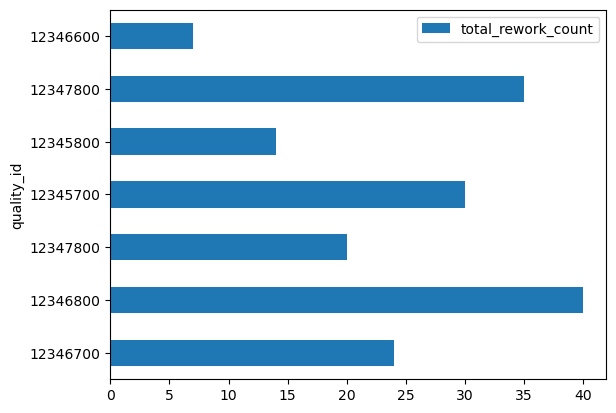

In [25]:
stage_1_2_3.plot(kind='barh',x='quality_id',y='total_rework_count')
plt.show()

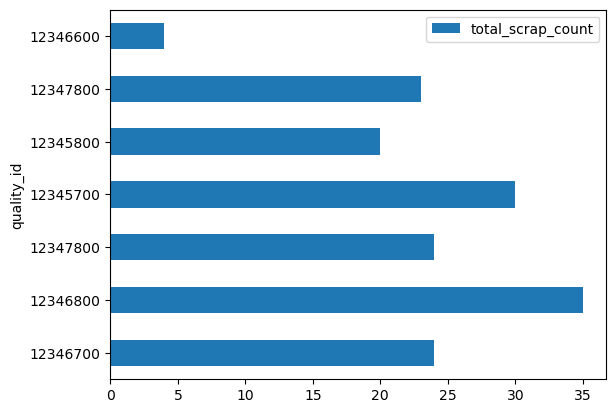

In [26]:
stage_1_2_3.plot(kind='barh',x='quality_id',y='total_scrap_count')
plt.show()

# Conclusion:
## Rework: 
- The highest rework count in assembly line is product id _800_ and the shift is **_12346_** and the count is 40
- For product id 700 the highest rework shift id happened in the shift **_12345_** and the count is 30

## Scrap
- The highest scrap was for product id _800_ and the shift is **_12346_** and the count is 35
- The highest scrap for product id _700_ was on shift **_12345_** and the count is 30

This also shows that more loss is happening in shift 12346 and 12345 for both product id 800 and 700 nearly the total count of scrap is 65 and the rework count is 70. More skilled worker or training, or proper check of machinery is required in this batches. Further analysis can be done with respect to assembly line to pinpoint exact assembly line. 